In [113]:
import pandas as pd
import numpy as np

In [114]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [115]:
def printinfo():
    temp = pd.DataFrame(index = df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    return temp

printinfo()

,data_type,null_count
App,object,0
Category,object,0
Rating,float64,1474
Reviews,object,0
Size,object,0
Installs,object,0
Type,object,1
Price,object,0
Content Rating,object,1
Genres,object,0


In [116]:
pointer = df.Type.isnull()
df[pointer]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [117]:
df['Type'].fillna("Free", inplace = True)

In [118]:
printinfo()

,data_type,null_count
App,object,0
Category,object,0
Rating,float64,1474
Reviews,object,0
Size,object,0
Installs,object,0
Type,object,0
Price,object,0
Content Rating,object,1
Genres,object,0


In [119]:
pointer = df['Content Rating'].isnull()
df[pointer]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [120]:
df[pointer] = ['Life Made Wi-Fi Touchscreen Photo Frame', 'LIFESTYLE', '1.9', '19.0', '3.0M', '1000+', 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018', '1.0.19', '4.0 and up' ]

In [121]:
df = df.drop(columns = ['Last Updated', 'Current Ver', 'Android Ver'])


In [122]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [123]:
modeValue = df['Rating'].mode()
df['Rating'].fillna(value=modeValue[0], inplace = True)

In [124]:
printinfo()

,data_type,null_count
App,object,0
Category,object,0
Rating,object,0
Reviews,object,0
Size,object,0
Installs,object,0
Type,object,0
Price,object,0
Content Rating,object,0
Genres,object,0


In [125]:
df['Rating'] = df.Rating.astype(float)
df['Reviews'] = df.Reviews.astype(float)
df['Reviews'] = df.Reviews.astype(int)

In [126]:
printinfo()

,data_type,null_count
App,object,0
Category,object,0
Rating,float64,0
Reviews,int32,0
Size,object,0
Installs,object,0
Type,object,0
Price,object,0
Content Rating,object,0
Genres,object,0


In [127]:
#print(df['Size'].unique())

In [128]:
df['Size'] = df.Size.apply(lambda x: x.strip('+'))
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))
df['Size'] = df.Size.replace('Varies with device', np.NaN)
df['Size'] = pd.to_numeric(df['Size'])
printinfo()

,data_type,null_count
App,object,0
Category,object,0
Rating,float64,0
Reviews,int32,0
Size,float64,1695
Installs,object,0
Type,object,0
Price,object,0
Content Rating,object,0
Genres,object,0


In [129]:
df.dropna(subset = ['Size'], inplace=True)
printinfo()

,data_type,null_count
App,object,0
Category,object,0
Rating,float64,0
Reviews,int32,0
Size,float64,0
Installs,object,0
Type,object,0
Price,object,0
Content Rating,object,0
Genres,object,0


In [130]:
#print(df['Installs'].unique())

In [131]:
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))
df['Installs'] = pd.to_numeric(df['Installs'])
printinfo()

,data_type,null_count
App,object,0
Category,object,0
Rating,float64,0
Reviews,int32,0
Size,float64,0
Installs,int64,0
Type,object,0
Price,object,0
Content Rating,object,0
Genres,object,0


In [132]:
print(df['Price'].unique())

['0' '$4.99' '$6.99' '$1.49' '$2.99' '$3.99' '$7.99' '$5.99' '$1.99'
 '$9.99' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99' '$79.99'
 '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$3.49' '$10.99' '$7.49'
 '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$2.49' '$4.49'
 '$1.70' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99' '$400.00' '$3.02'
 '$1.76' '$4.84' '$4.77' '$1.61' '$1.59' '$6.49' '$1.29' '$5.00' '$13.99'
 '$299.99' '$379.99' '$37.99' '$18.99' '$389.99' '$19.90' '$8.49' '$1.75'
 '$14.00' '$4.85' '$46.99' '$109.99' '$154.99' '$3.08' '$2.59' '$4.80'
 '$8.99' '$1.96' '$19.40' '$15.46' '$3.04' '$4.29' '$2.60' '$3.28' '$4.60'
 '$28.99' '$2.90' '$1.97' '$200.00' '$89.99' '$2.56' '$30.99' '$3.61'
 '$394.99' '$1.26' '$1.20' '$1.04']


In [133]:
df['Price'] = df.Price.apply(lambda x: x.strip('$'))
df['Price'] = pd.to_numeric(df['Price'])
printinfo()

,data_type,null_count
App,object,0
Category,object,0
Rating,float64,0
Reviews,int32,0
Size,float64,0
Installs,int64,0
Type,object,0
Price,float64,0
Content Rating,object,0
Genres,object,0


In [134]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9146.000000,9.146000e+03,9.146000e+03,9.146000e+03,9146.000000
mean,4.208616,2.490215e+05,2.151450e+07,7.114065e+06,1.184237
std,0.507813,1.716119e+06,2.258834e+07,4.619110e+07,17.354809
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.410000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503650e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [137]:
print(df.size)
print(df.shape)

91460
(9146, 10)


In [138]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [139]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [140]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [141]:
df['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               346
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [211]:
x = df['Category'].value_counts()
n = len(x)
y = df['Category'].value_counts().index
xvar, yvar = [], []
for i in range(n):
    xvar.append(x[i])
    yvar.append(y[i])
# print(len(xvar), len(yvar))

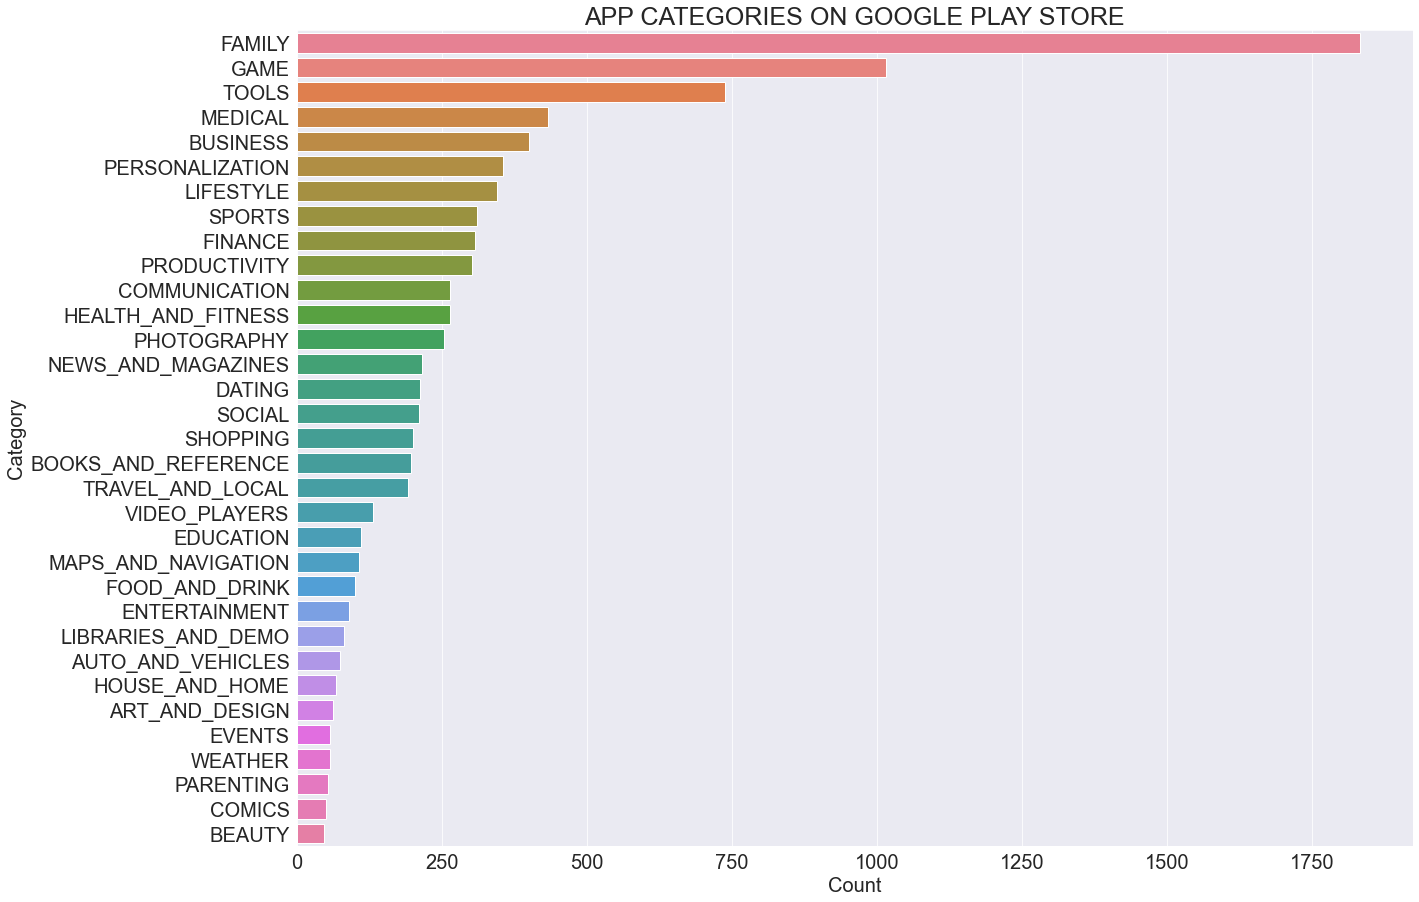

In [212]:
plt.figure(figsize=(20,15))
plt.xlabel("Count")
plt.ylabel("Category")

fig1 = sns.barplot(x = xvar, y = yvar, palette = "husl")
fig1.set_title("APP CATEGORIES ON GOOGLE PLAY STORE", fontsize=25);

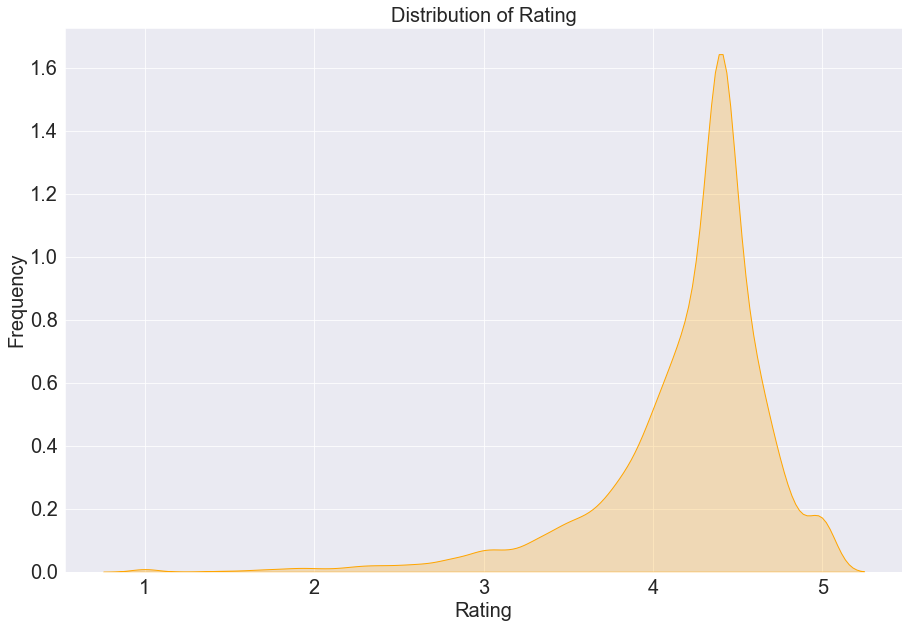

In [176]:
plt.figure(figsize=(15,10))
plt.xlabel("Rating")
plt.ylabel("Frequency")
fig2 = sns.kdeplot(df.Rating, color="Orange", shade = True)
fig2.set_title('Distribution of Rating',fontsize = 20);

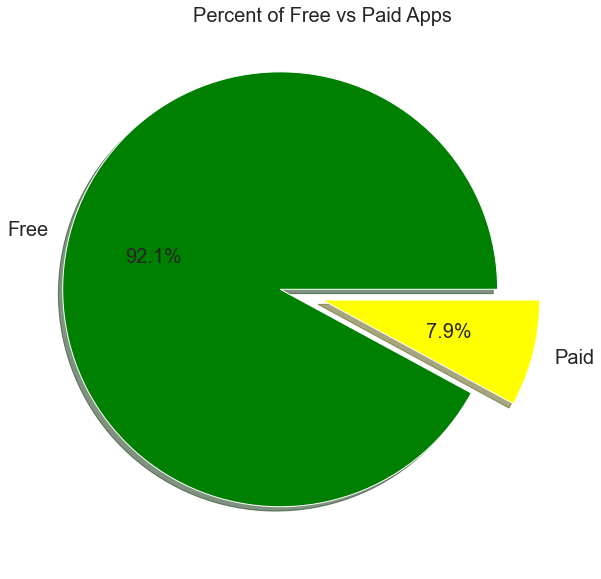

In [200]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["green","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free vs Paid Apps',size = 20)
plt.show()


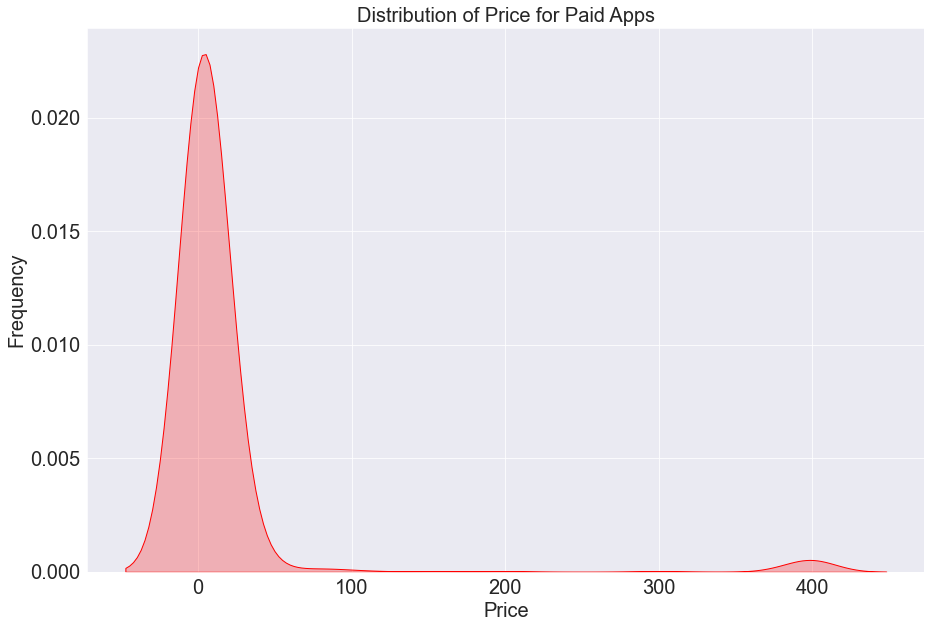

In [210]:
temp_paid = df.Price[df.Price!=0]

plt.figure(figsize=(15,10))
plt.xlabel("Price")
plt.ylabel("Frequency")
fig2 = sns.kdeplot(temp_paid, color="Red", shade = True)
fig2.set_title('Distribution of Price for Paid Apps',fontsize = 20);

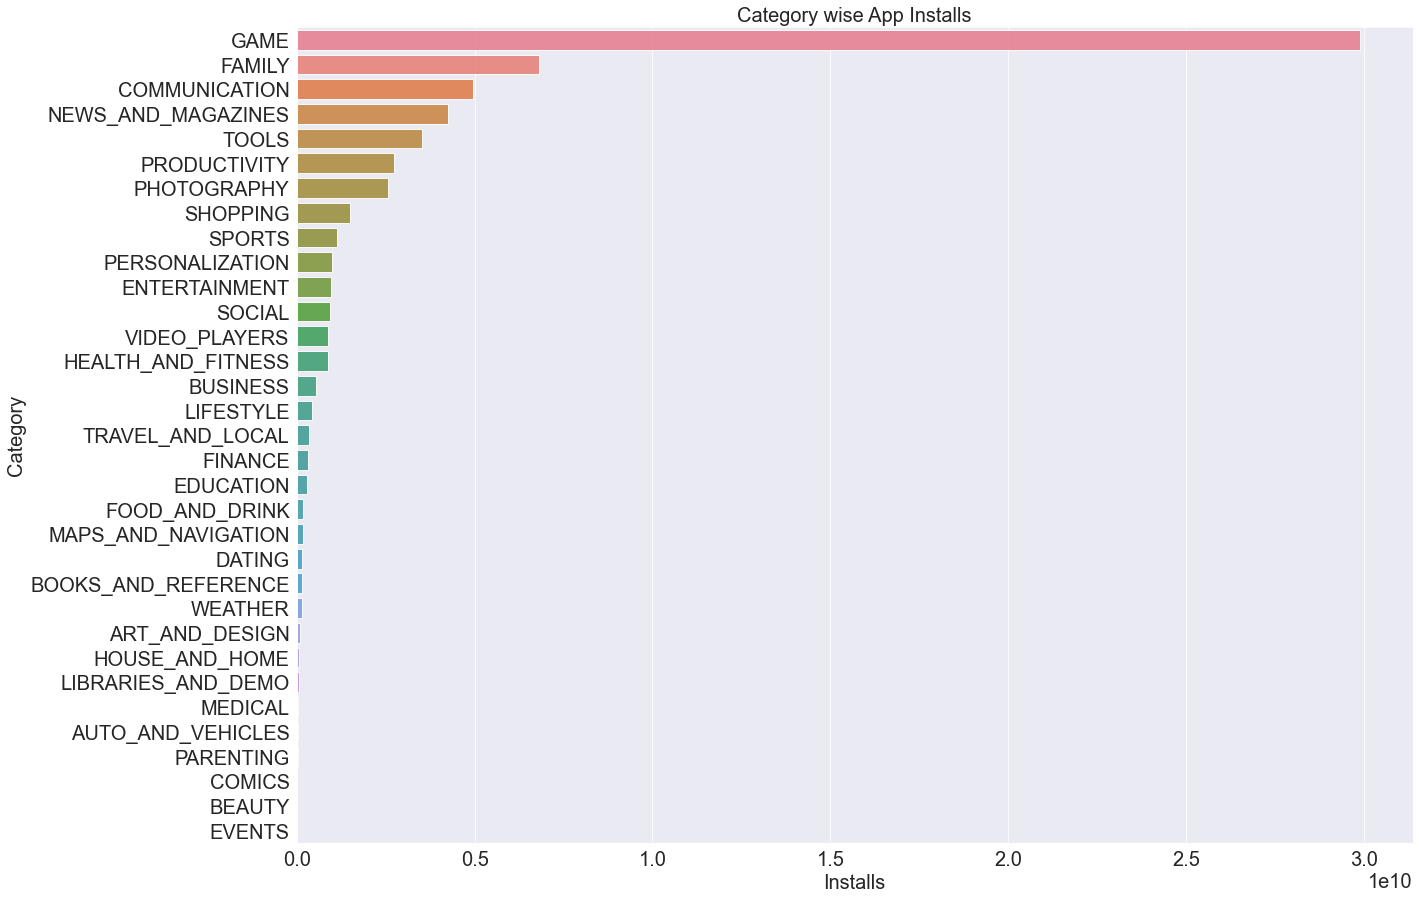

In [220]:
installs_category_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
xvar = []
yvar = []

for i in range(len(installs_category_df)):
    xvar.append(installs_category_df.Installs[i])
    yvar.append(installs_category_df.index[i])

plt.figure(figsize=(20,15))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = xvar, y = yvar, alpha =0.9, palette= "husl")
graph.set_title("Category wise App Installs", fontsize = 20);

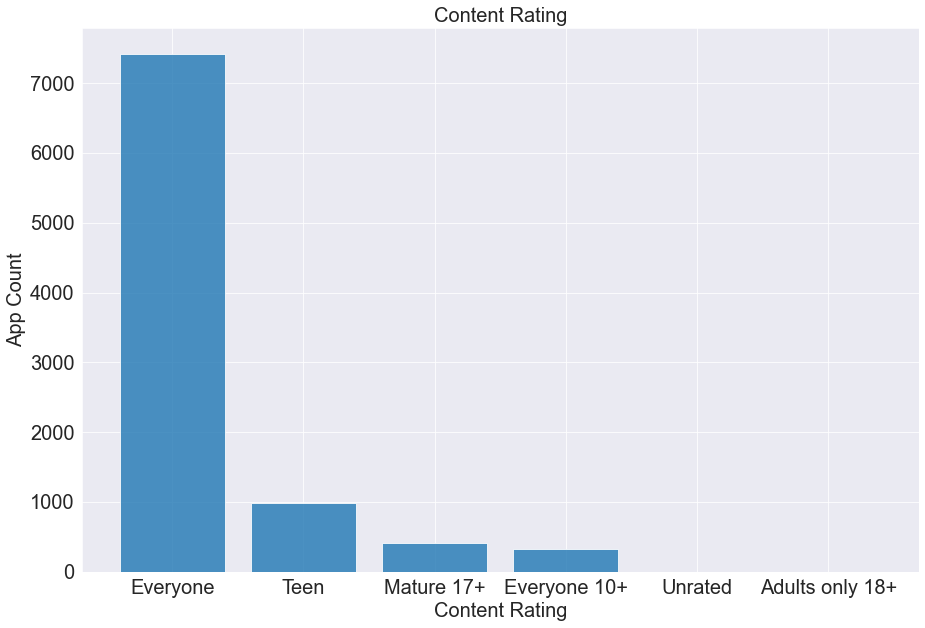

In [221]:
x = df['Content Rating'].value_counts().index
y = df['Content Rating'].value_counts()

xvar = []
yvar = []
for i in range(len(x)):
    xvar.append(x[i])
    yvar.append(y[i])

plt.figure(figsize=(15,10))
plt.bar(xvar,yvar,width=0.8, alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('App Count');
plt.xlabel('Content Rating');